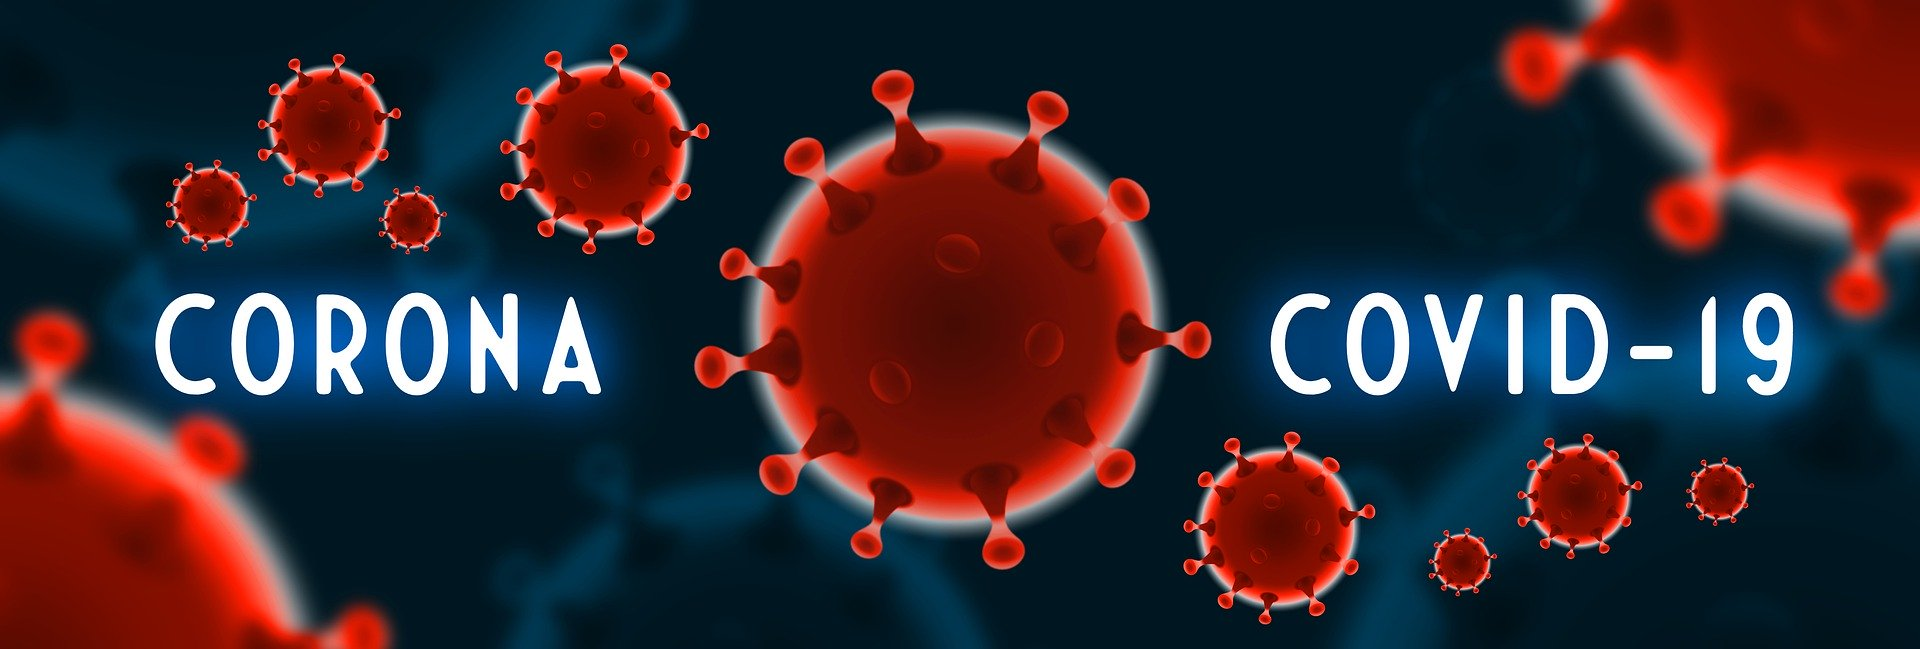

# Covid Introduction

Add some text here about importance of this

## Data Collection/Curation

In [8]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, re, datetime

The John's Hopkins curated dataset can be found [here](https://github.com/CSSEGISandData/COVID-19). For our analysis, we'll be using the time series csv file for confirmed cases and deaths.

In [14]:
confirmed_US = pd.read_csv("datasets/time_series_covid19_confirmed_US.csv")
deaths_US = pd.read_csv("datasets/time_series_covid19_deaths_US.csv")

confirmed_US.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22,4/11/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15659,15659,15689,15692,15724,15742,15744,15744,15744,15747
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,55420,55420,55431,55449,55456,55468,55489,55489,55489,55499
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5656,5656,5656,5656,5657,5658,5658,5658,5658,5658
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6417,6417,6419,6419,6420,6421,6422,6422,6422,6425
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,14901,14901,14902,14903,14905,14926,14929,14929,14929,14934
5,84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,...,2303,2303,2303,2303,2303,2304,2304,2304,2304,2303
6,84001013,US,USA,840,1013.0,Butler,Alabama,US,31.753001,-86.680575,...,5051,5051,5051,5051,5052,5052,5052,5052,5052,5052
7,84001015,US,USA,840,1015.0,Calhoun,Alabama,US,33.774837,-85.826304,...,32355,32355,32356,32359,32358,32355,32355,32355,32355,32359
8,84001017,US,USA,840,1017.0,Chambers,Alabama,US,32.913601,-85.390727,...,8468,8468,8469,8469,8469,8471,8471,8471,8471,8474
9,84001019,US,USA,840,1019.0,Cherokee,Alabama,US,34.178060,-85.606390,...,5110,5110,5112,5112,5113,5114,5115,5115,5115,5116


<em>Talk about what to do if data wasn't nicely available in a csv/tsv file...</em>

## Data management/representation

*Talk about handling missing values here*

In [15]:
# Checking for missing values
confirmed_US.isnull().sum()

UID         0
iso2        0
iso3        0
code3       0
FIPS       10
           ..
4/7/22      0
4/8/22      0
4/9/22      0
4/10/22     0
4/11/22     0
Length: 822, dtype: int64

*Talk about tidy data here...*

The dataset above has each date as an individual column thus making the table too "wide". This in turn makes it harder in analyzing the date (albeit it's easier to read). We'll convert the table from the current wide format to a long format by turning each date column into their own row through a process called melting. More information about melting can be found [here](https://dataindependent.com/pandas/pandas-melt-pd-melt/).

In [16]:
# finding index of first date
idx = next(x for x in confirmed_US.columns.values if (re.match('(\d{1,2})[/.-](\d{1,2})[/.-](\d{2})$', x)))
idx = np.where(confirmed_US.columns.values == idx)[0][0]

# melting our dataframe with our identifier variables being everything up to idx
confirmed_US = pd.melt(confirmed_US, id_vars=confirmed_US.columns[0:idx])
confirmed_US.rename(columns={"value": "Cases", "variable": "Date"}, inplace=True)
confirmed_US.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0
5,84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,"Bullock, Alabama, US",1/22/20,0
6,84001013,US,USA,840,1013.0,Butler,Alabama,US,31.753001,-86.680575,"Butler, Alabama, US",1/22/20,0
7,84001015,US,USA,840,1015.0,Calhoun,Alabama,US,33.774837,-85.826304,"Calhoun, Alabama, US",1/22/20,0
8,84001017,US,USA,840,1017.0,Chambers,Alabama,US,32.913601,-85.390727,"Chambers, Alabama, US",1/22/20,0
9,84001019,US,USA,840,1019.0,Cherokee,Alabama,US,34.178060,-85.606390,"Cherokee, Alabama, US",1/22/20,0


Here we see that our number of columns have been reduced from 822 to just 13! Although our number of rows did increase by the respective amount that the columns decreased, this is fine as we want each observation (dates in our case) to be in its own row.

In addition to melting our data, our next step would be to convert each of the dates inside our dataframe to [datetime](https://docs.python.org/3/library/datetime.html) objects. These are objects supplied by the datetime module that allows us to easily perform comparison operations and range queries on ates which will be needed later on. To make things easier, pandas has a method called ```to_datetime()``` that allows us to streamline this process.

In [88]:
confirmed_US['Date'] = pd.to_datetime(confirmed_US['Date'], format="%m/%d/%y")
confirmed_US.head(1000)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",2020-01-22,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",2020-01-22,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",2020-01-22,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",2020-01-22,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",2020-01-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,84020139,US,USA,840,20139.0,Osage,Kansas,US,38.652360,-95.727080,"Osage, Kansas, US",2020-01-22,0
996,84020141,US,USA,840,20141.0,Osborne,Kansas,US,39.350344,-98.767538,"Osborne, Kansas, US",2020-01-22,0
997,84020143,US,USA,840,20143.0,Ottawa,Kansas,US,39.132374,-97.650203,"Ottawa, Kansas, US",2020-01-22,0
998,84080020,US,USA,840,80020.0,Out of KS,Kansas,US,0.000000,0.000000,"Out of KS, Kansas, US",2020-01-22,0


We're not concerned about the cases from the county inside of each state but more about the total cases for the state itself. Here we'll aggregate the cases in each state by adding up all the county cases.

In [83]:
totalCases_US = confirmed_US.groupby(['Province_State', 'Date']).agg({'Cases': 'sum'})
totalCases_US.reset_index(inplace=True)  
totalCases_US[totalCases_US['Cases'] > 0].head(10)

,Province_State,Date,Cases
49,Alabama,2020-03-11,3
50,Alabama,2020-03-12,4
51,Alabama,2020-03-13,8
52,Alabama,2020-03-14,15
53,Alabama,2020-03-15,28
54,Alabama,2020-03-16,36
55,Alabama,2020-03-17,51
56,Alabama,2020-03-18,61
57,Alabama,2020-03-19,88
58,Alabama,2020-03-20,115


Now we have the total number of cases fo each state for each date. However, this total number of cases is not relevant for our purposes. What we really want is the number of daily cases each day which is defined by the total cases today minus the total cases yesterday. 

We'll manipulate our dataframe so that we have an additional column called ```daily_cases``` defined as above. We'll take advatange of pandas's ```diff()``` function which allows us to compute the difference of a column between consecutive rows in one line. One issue with directly doing this is that at positions where we transition from one state to the next, we can have large negative values because ```diff()``` is subtracting the most recent total cases for one state from the oldest total cases for a different state. To circumvent this, we'll filter and perform the ```diff()``` separetly for each state.

In [179]:
# getting a list of states in our dataset
states = np.unique(confirmed_US['Province_State'].values)
totalCases_US['daily_cases'] = np.NaN # instanstiating with default value of NaN

# iterating through each state
for s in states:
    filtered = totalCases_US.loc[totalCases_US['Province_State'] == s] # getting a separate  dataframe for each state
    totalCases_US.loc[totalCases_US['Province_State'] == s, 'daily_cases']= filtered['Cases'].diff() # adding daily_cases

totalCases_US[totalCases_US['Province_State'] == "American Samoa"].head(10)

,Province_State,Date,Cases,daily_cases,log_daily
1622,American Samoa,2020-01-22,0,NaN,NaN
1623,American Samoa,2020-01-23,0,0.0,-inf
1624,American Samoa,2020-01-24,0,0.0,-inf
1625,American Samoa,2020-01-25,0,0.0,-inf
1626,American Samoa,2020-01-26,0,0.0,-inf
1627,American Samoa,2020-01-27,0,0.0,-inf
1628,American Samoa,2020-01-28,0,0.0,-inf
1629,American Samoa,2020-01-29,0,0.0,-inf
1630,American Samoa,2020-01-30,0,0.0,-inf
1631,American Samoa,2020-01-31,0,0.0,-inf


## Exploratory data analysis

In this next step, we want to get a feel for the data through visualizing and computing summary statistics for our dataset. Through the plots and statisitcs, we'll be able to notice trends in the data as well as the distribution. These key insights will give us an idea of what approaches we should take for our machine learning algorithms.

Since one of our main questions is to determine whether states have different average rates of infections, the most obvious thing to do here is to plot the daily infections for each state over the length of COVID. 

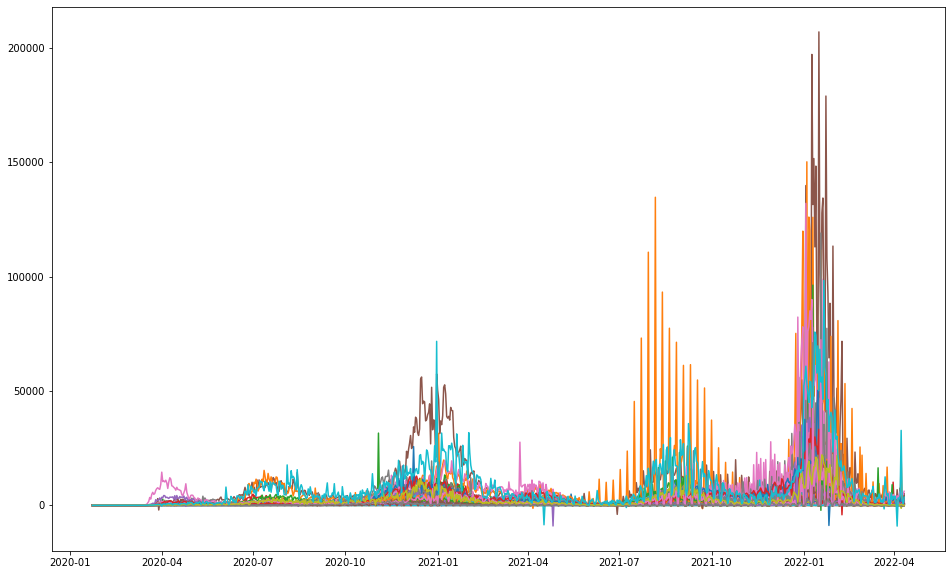

In [194]:
fig, ax = plt.subplots(figsize=(16,10))

for s in states[0:50]:
    state_filter = totalCases_US.loc[totalCases_US['Province_State'] == s]
    ax.plot(state_filter['Date'], state_filter['daily_cases'])

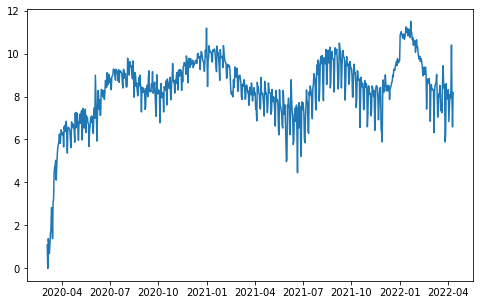

In [195]:
logFilter = totalCases_US[totalCases_US['daily_cases'] > 0]

state_filter = logFilter.loc[logFilter['Province_State'] == s]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(state_filter['Date'], np.log(state_filter['daily_cases'].values))

In [155]:

plt.show()

## Hypothesis Testing

## Communication of Insights